# Sales Effectiveness

## Project Member's Name : 

  #####  1. Logeshwary Selvaraj 
  
  #####  2. Kishore Kumar S 
  
  #####  3. Bharath K 
  
  #####  4. Nawaz Hussain Z 


# Problem Statement


### Project Requirement :

* FicZon Inc is an IT solution provider with products ranging from on-premises products to SAS based solutions. FicZon major leads generation channel is digital and through their website.

* FicZon business is majorly dependent on the sales force effectiveness (helping companies improve their sales results). As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales. Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation.

* FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.


### PROJECT GOAL :

1) Data exploration insights – Sales effectiveness.

2) ML model to predict the Lead Category.

## Loading Database :

In [1]:
#!pip install pymysql
#!pip install mysql-connector

import os
import mysql.connector

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

import warnings 
warnings.filterwarnings('ignore')


In [2]:
# Establish a connection to a MySQL database using Python's mysql.connector library

connection = mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')

# Retrieve the list of tables in the database using pd.read_sql_query function
db_tables = pd.read_sql_query('show tables',connection)

In [3]:
query = " select * from data "
query

' select * from data '

In [4]:
data = pd.read_sql(query,connection)
data.head(2)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open


###### =================================================================================================================

# Domain Analysis :

In [5]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [6]:
print(data.shape)
print(data.columns)

(7422, 9)
Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [8]:
data.describe(include='O')

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


## Attribute Information

### Input variables:
1) **Created** - This variable represents the timestamp or date_time when a sales record or transaction was created.

2) **Product_ID** - This variable represents the unique ID of the product being sold.

3) **Source** - This variable indicates the source from which the sales lead or customer was acquired. 

4) **Mobile** - Indicate customer's mobile number.

5) **EMAIL** - Indicates the customer's email address.

6) **Sales_Agent** - It represents the sales agent involved in the transaction.

7) **Location** - It reoresents location or region where the sales transaction took place.

8) **Delivery_Mode** - This variable represents the mode of product delivery.


### Target Variable :

9) **Status** - This is our target variable that representing the **current status of the sales transaction**.



In [9]:
#Target Variable
data.Status.unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

* **The dataset is supervised and categorical in nature having 9 columns and 7422 records.**
* **All the variables are in object type and there is no null values.**
* **We have to drop some columns like 'Created','Mobile','EMAIL', because these feature are not require for training our model.** 

In [10]:
data['Created'].unique()

array(['14-11-2018 10:05', '14-11-2018 09:22', '14-11-2018 09:21', ...,
       '28-04-2018 09:20', '28-04-2018 08:04', '28-04-2018 07:54'],
      dtype=object)

In [11]:
data['Mobile'].unique()

array(['984XXXXXXX', 'XXXXXXX', '078XXXXXXX', '467XXXXXXX', '971XXXXXXX',
       '701XXXXXXX', '04.XXXXXXX', '805XXXXXXX', '+96XXXXXXX',
       '790XXXXXXX', '970XXXXXXX', '740XXXXXXX', '994XXXXXXX',
       '+49XXXXXXX', '962XXXXXXX', '953XXXXXXX', '858XXXXXXX',
       '974XXXXXXX', '900XXXXXXX', '982XXXXXXX', '754XXXXXXX',
       '981XXXXXXX', '992XXXXXXX', '735XXXXXXX', '894XXXXXXX',
       '888XXXXXXX', '986XXXXXXX', '983XXXXXXX', '798XXXXXXX',
       '988XXXXXXX', '636XXXXXXX', '916XXXXXXX', '879XXXXXXX',
       '146XXXXXXX', '967XXXXXXX', '828XXXXXXX', '866XXXXXXX',
       '996XXXXXXX', '447XXXXXXX', '985XXXXXXX', '748XXXXXXX',
       '807XXXXXXX', '+48XXXXXXX', '954XXXXXXX', '902XXXXXXX',
       '937XXXXXXX', '883XXXXXXX', '831XXXXXXX', '886XXXXXXX',
       '768XXXXXXX', '836XXXXXXX', '776XXXXXXX', '959XXXXXXX',
       '998XXXXXXX', '850XXXXXXX', '964XXXXXXX', '789XXXXXXX',
       '628XXXXXXX', '956XXXXXXX', '814XXXXXXX', '963XXXXXXX',
       '+91XXXXXXX', '817XXXXXXX', '-55XXXXX

In [12]:
data['EMAIL'].unique()

array(['aXXXXXXX@gmail.com', '#VALUE!', 'dXXXXXXX@yahoo.com',
       'wXXXXXXX@gmail.com', 'cXXXXXXX@gmail.com', 'rXXXXXXX@gmail.com',
       'DXXXXXXXheblue.com', 'jXXXXXXX@gmail.com', 'dXXXXXXXt9@aol.com',
       'eXXXXXXX@gmail.com', 'bXXXXXXX@gmail.com', 'SXXXXXXXutlook.com',
       'mXXXXXXX@gmail.com', 'WXXXXXXXlowpol.com', 'hXXXXXXX@gmail.com',
       'gXXXXXXX@gmail.com', 'nXXXXXXX@gmail.com', 'nXXXXXXXabirla.com',
       'mXXXXXXXs@mail.com', 'vXXXXXXX@gmail.com', 'vXXXXXXXutlook.com',
       'sXXXXXXX@gmail.com', 'kXXXXXXXiimu.ac.in', 'gXXXXXXXologies.in',
       'sXXXXXXXe@live.com', 'rXXXXXXXffmail.com', 'pXXXXXXX@gmail.com',
       'jXXXXXXX@yahoo.com', 'RXXXXXXXahoo.co.in', 'sXXXXXXX@yahoo.com',
       'tXXXXXXX@gmail.com', 'mXXXXXXX@yahoo.com', 'jXXXXXXXpeurope.eu',
       'SXXXXXXX@gmail.com', 'rXXXXXXXotmail.com', 'kXXXXXXX@gmail.com',
       'AXXXXXXX@gmail.com', 'CXXXXXXXeingop.com', 'dXXXXXXX@gmail.com',
       'rXXXXXXXn@yahoo.in', 'rXXXXXXX@yahoo.com', 'PXXXXXXX@g

In [13]:
# There is no direct relevance to some columns like 'Created','Mobile','EMAIL'. 
# So we deleting that columns which is not relevent for training model.

data.drop(['Created','Mobile','EMAIL'],  axis=1, inplace=True)

In [14]:
print(data.columns.value_counts().sum())
data.head()

6


,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,,Website,Sales-Agent-11,,Mode-5,Open
1,,Website,Sales-Agent-10,,Mode-5,Open
2,,Website,Sales-Agent-10,,Mode-5,Open
3,,Website,Sales-Agent-10,,Mode-5,Open
4,,Website,Sales-Agent-10,,Mode-5,Open


#### Now we have only 6 features columns including target.

In [15]:
data.describe(include="O")

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422
unique,30,26,13,18,5,11
top,18,Call,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,1711,2547,1500,2500,2975,1536


###### =================================================================================================================

# Exploratory Data Analysis (EDA) :

## ( 1 ) .  Univariate Analysis :-

### ( i ) . Source :

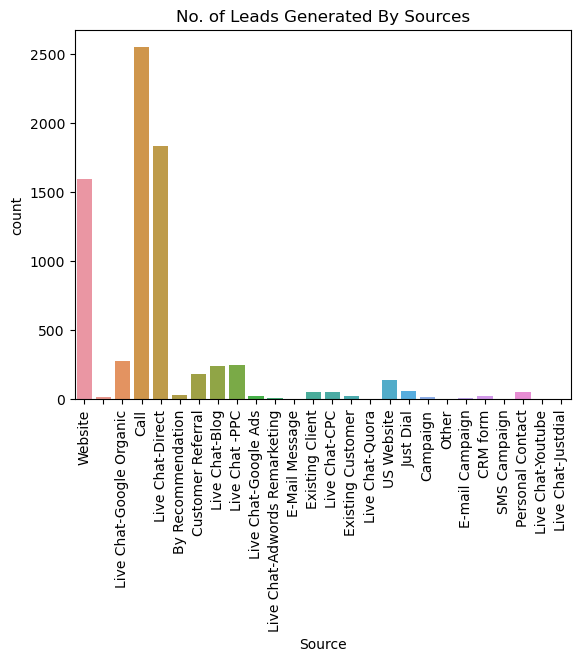

In [16]:
# Univariate Analysis For Source

sns.countplot(x=data.Source)
plt.title("No. of Leads Generated By Sources")
plt.xticks(rotation=90)
plt.show()

**Insights from Source:-**
- 34 % Leads were generarted from Call Source .
- 25 % Leads were Generated from live direct chat .
- 21 % Leads were generated from their Website .
- 11 % Leads were generated from Live chat in Google , PPC , Blog and US Website.
- remaining 10 % leads were generated from other sources .

### ( ii ) . Sales Agent :

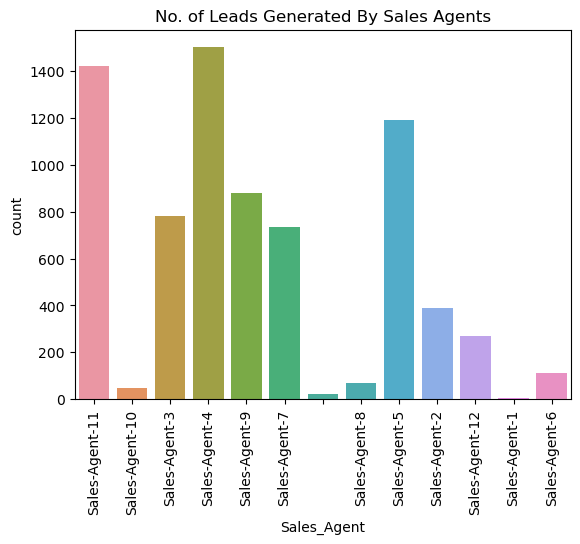

In [17]:
# Univariate analysis of Sales Agents
sns.countplot(x=data.Sales_Agent)
plt.title("No. of Leads Generated By Sales Agents")
plt.xticks(rotation=90)
plt.show()

#### Insights  For Sales Agent:-
- Agent-3 , Agent-4 , Agent-5 , Agent-7 , Agent-9 and Agent-11 togatherly Generated More than 87 %  Leads. 
- Agent-1 , Agent-2 , Agent-6 , Agent-8 , Agent-10 and Agent-12  are  togatherly Generated less than 13 %  Leads.

### ( iii ) . Location :

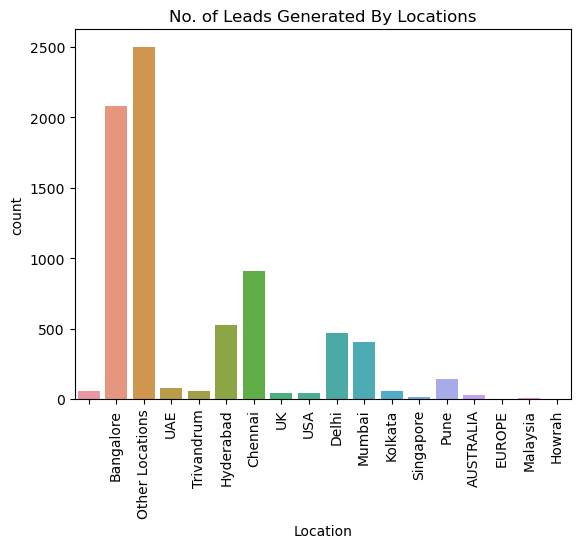

In [18]:
# Univariate Analysis for Location
sns.countplot(x=data.Location)
plt.title("No. of Leads Generated By Locations")
plt.xticks(rotation=90)
plt.show()

#### Insights from Location:-
- 33 % Leads were generated from Other Locations.
-  from Bangalore 28% and Chennai 12%  Leads were Generated.
- From Hyderabad 7% , Delhi 6% and Mumbai 5%  Leads were Generated.

### ( iv ) . Delivery Mode :

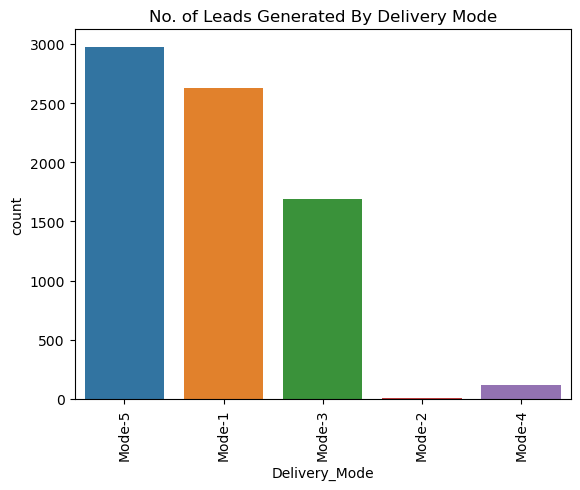

In [19]:
# Univariate analysis for Delivery Mode
sns.countplot(x=data.Delivery_Mode)
plt.title("No. of Leads Generated By Delivery Mode")
plt.xticks(rotation=90)
plt.show()

### Insights  from Delivery mode:-

- Most of Leads prefered Mode-5 , Mode-1 ,Mode-3

### ( v ) . Status Of Lead :

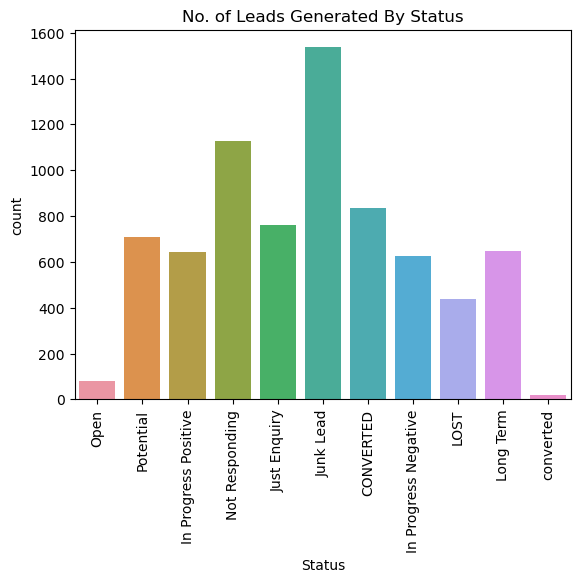

In [20]:
# Uniovariate Analysis for Status of Leads
sns.countplot(x=data.Status)
plt.title("No. of Leads Generated By Status")
plt.xticks(rotation=90)
plt.show()

#### Insights from Leads Status :-
- 20 %  Leads which are generated , they are Junk Leads.
- 15 % Leads were Not Responding.
- 11 % Leads got Convorted .(Successed)
- 10 % Leads are just Enquired.

## ( 2 ) .  Bi - Variate Analysis :-

### Preprocessing for Bi-Variate Analysis :-

- According to Business Case we have to **combine target Classes** and differnciate into **Two Categories**.

- **High Potential** -  CONVERTED,Potential,In Progress Positive,converted .

- **Low Potential** - Junk Lead, Not Responding, Just Enquiry, Long Term, In Progress Negative, LOST and Open

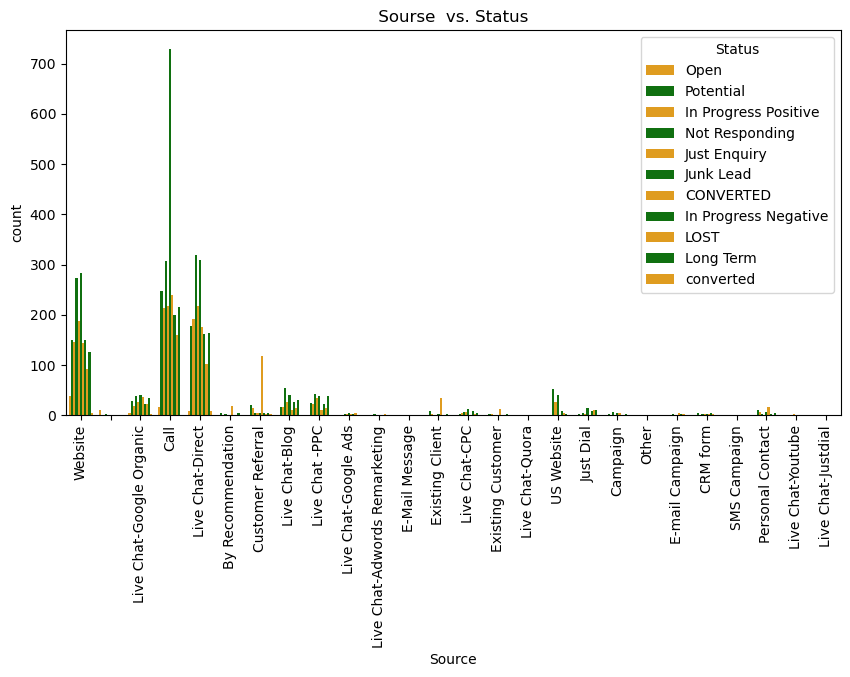

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x=data.Source,hue=data.Status,palette=['orange','green'])
plt.title(" Sourse  vs. Status ")
plt.xticks(rotation=90)
plt.show()

### Insights (Sources vs Status) :-

- Leads Generated by the following have high potential are :
                                      - by Recommendation 
                                      - Customer Referral 
                                      - Existing Client 
                                      - Existing Customer
                                      - Personal Contact
                                      
- Leads Generated By the following have approximately 50% Chance for High  Potential are :
          - Website
          - Live Chat Google Organic
          - Call
          - Live Chat Direct
          - Live Chat Blog
          - Live Chat PPC

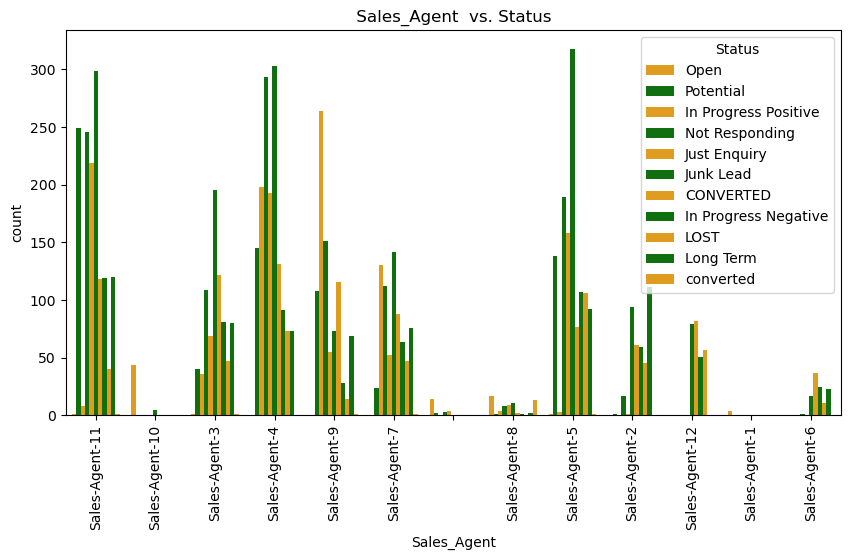

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x=data.Sales_Agent,hue=data.Status,palette=['orange','green'])
plt.title(" Sales_Agent  vs. Status ")
plt.xticks(rotation=90)
plt.show()

### Insights (Agent vs Potential):-
- Leads Generated by Sales-Agent-9 have High Potential.
- Leads Generated by Sales-Agent-10 and Sales-Agent-1 have Low Potential.
- Leads Generated by other Agents have more than 40 % High Potential 

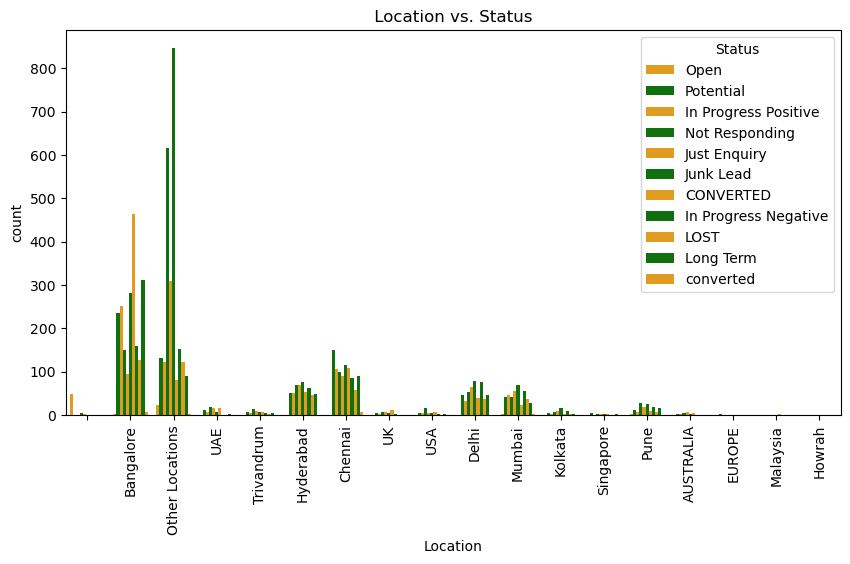

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x=data.Location,hue=data.Status,palette=['orange','green'])
plt.title(" Location vs. Status ")
plt.xticks(rotation=90)
plt.show()

### Insights (Loction vs Status ) :-
-  Leads Generated in Bangalore , UAE , UK , USA and AUSTRALIA having High Potential.
- only 40 % Leads have  High potential which Leads are Generated in Mumbai , Delhi , Hydrabad , Chennai and remaining 60 % has Low Potential

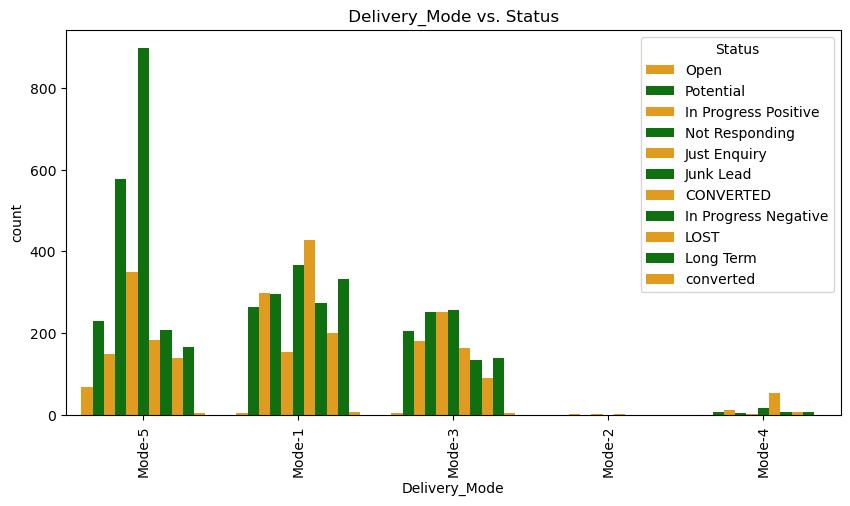

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x=data.Delivery_Mode,hue=data.Status,palette=['orange','green'])
plt.title(" Delivery_Mode vs. Status ")
plt.xticks(rotation=90)
plt.show()

### Insights (Delivery Mode vs. Status )  :-
- Leads who choose delivery MODE-5 , they have low chance of having High Potential as compared to other.
- High Potential Leads choose MODE-4 as delivery mode.n

In [27]:
#import sweetviz as sv
#sv.analyze(data).show_html() 

<Axes: >

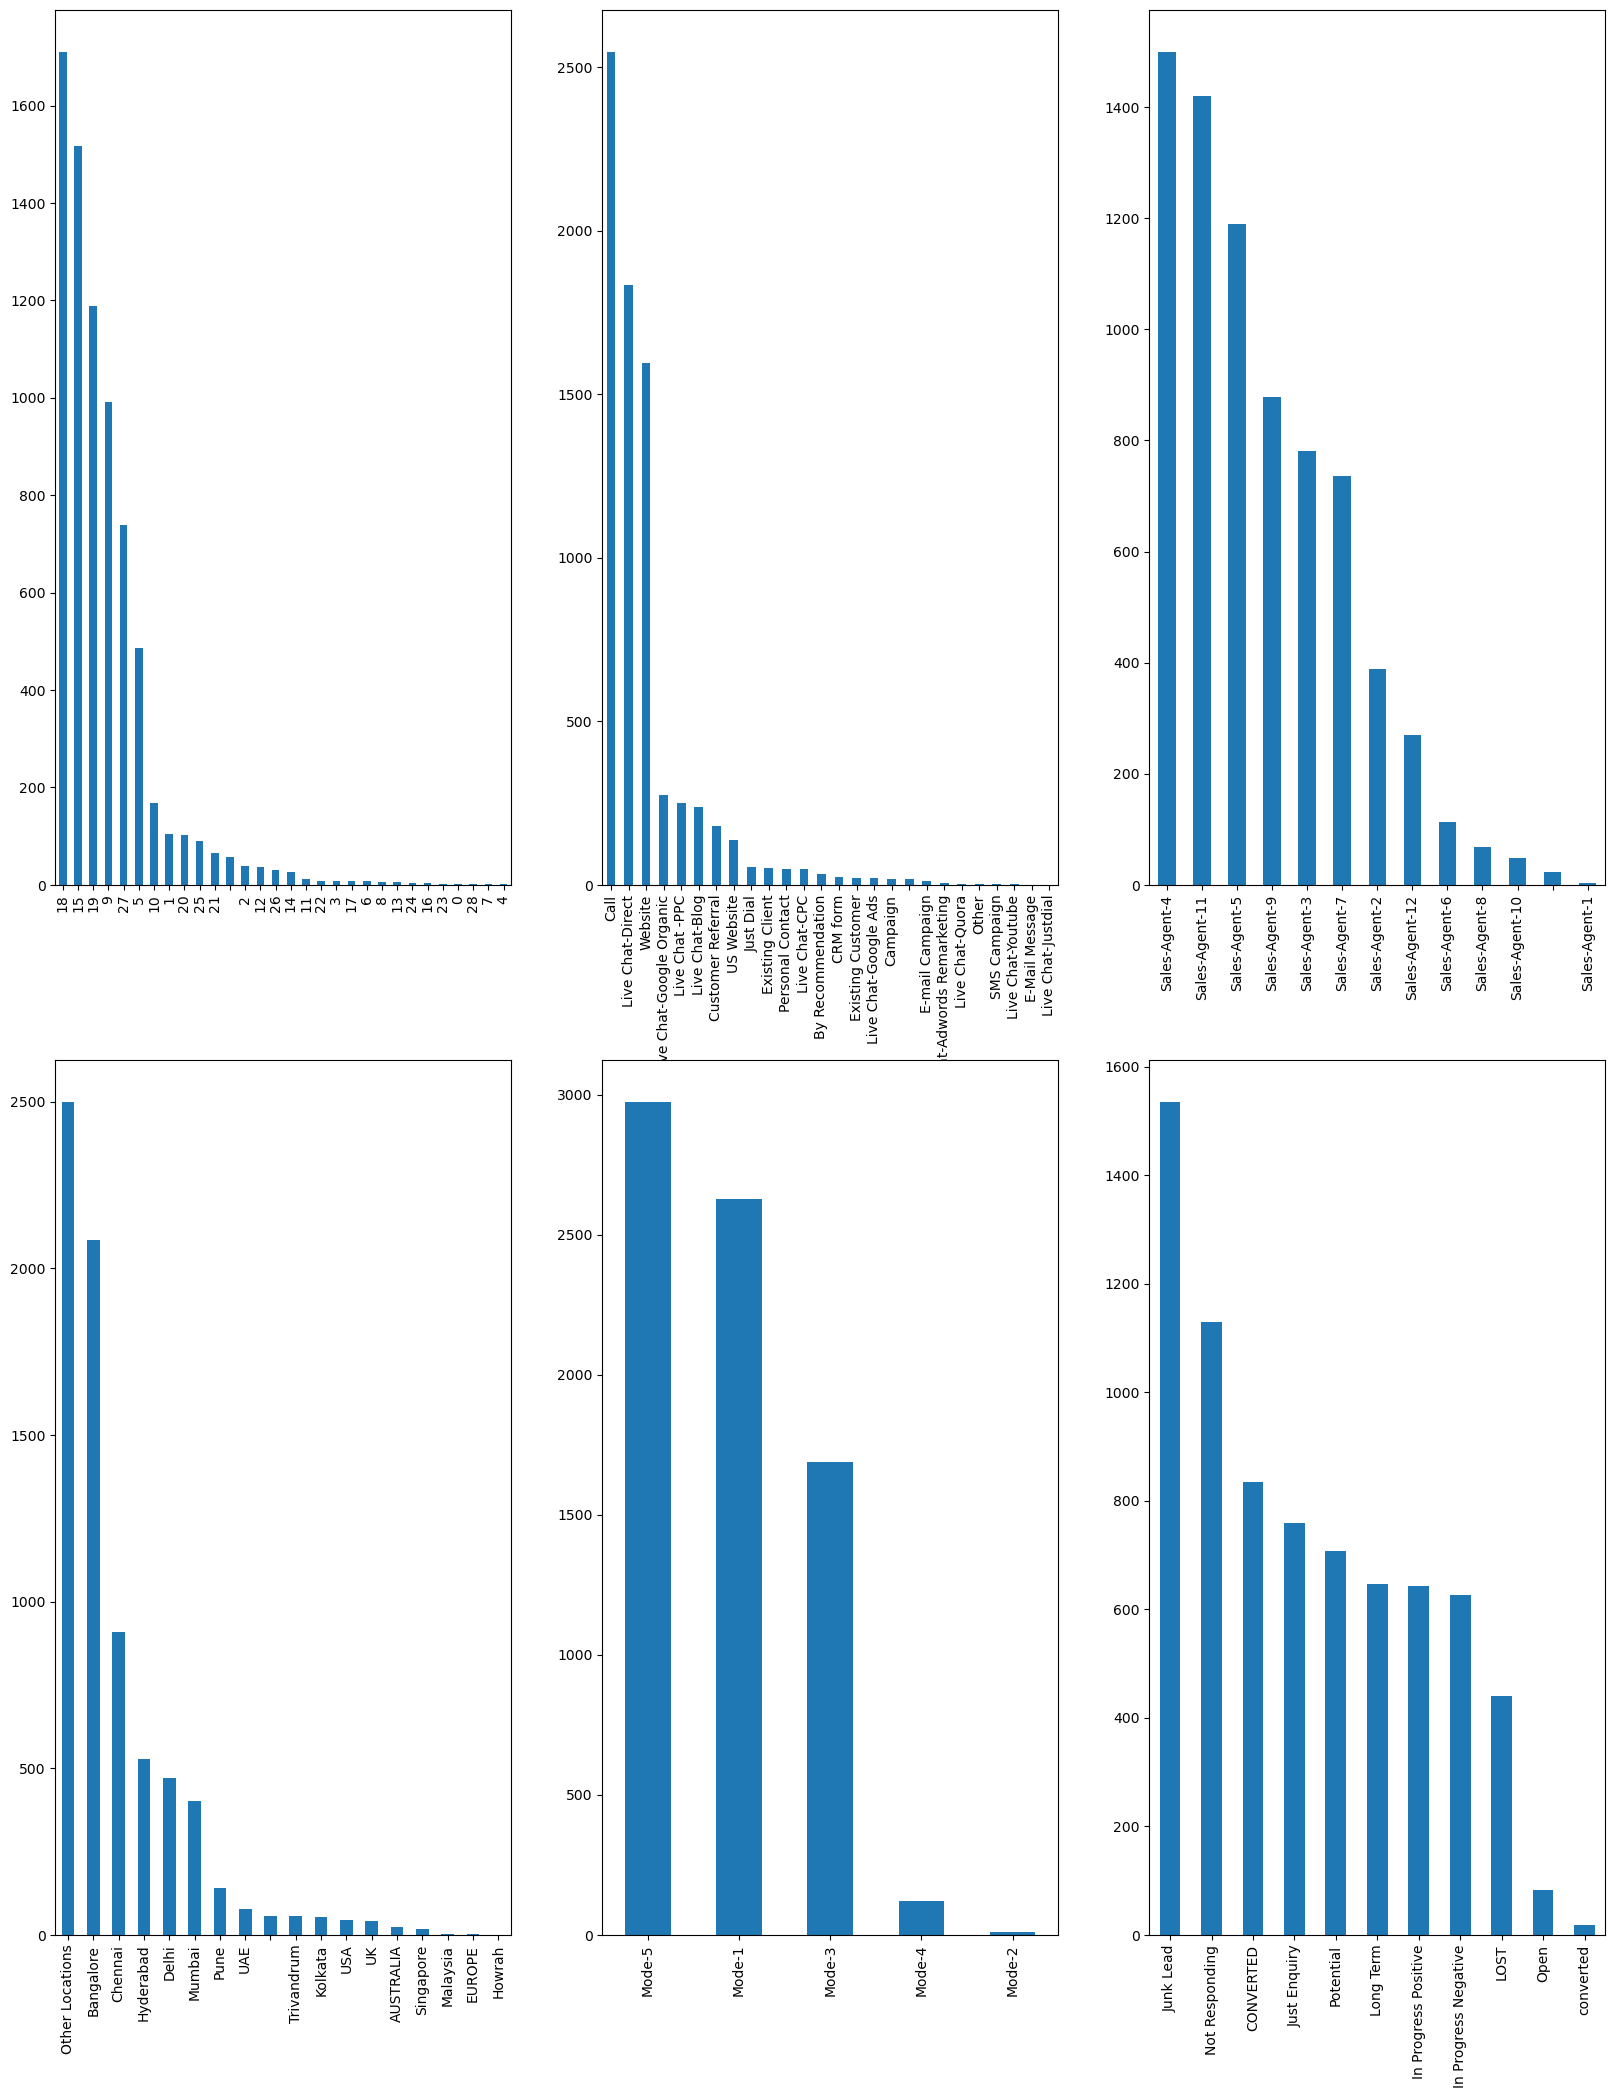

In [28]:
# Plotting the labels in each Features

plt.figure(figsize=(20,25)) #set canvas

plt.subplot(2,3,1)
data.Product_ID.value_counts().plot(kind='bar')

plt.subplot(2,3,2)
data.Source.value_counts().plot(kind='bar')

plt.subplot(2,3,3)
data.Sales_Agent.value_counts().plot(kind='bar')

plt.subplot(2,3,4)
data.Location.value_counts().plot(kind='bar')

plt.subplot(2,3,5)
data.Delivery_Mode.value_counts().plot(kind='bar')

plt.subplot(2,3,6)
data.Status.value_counts().plot(kind='bar')

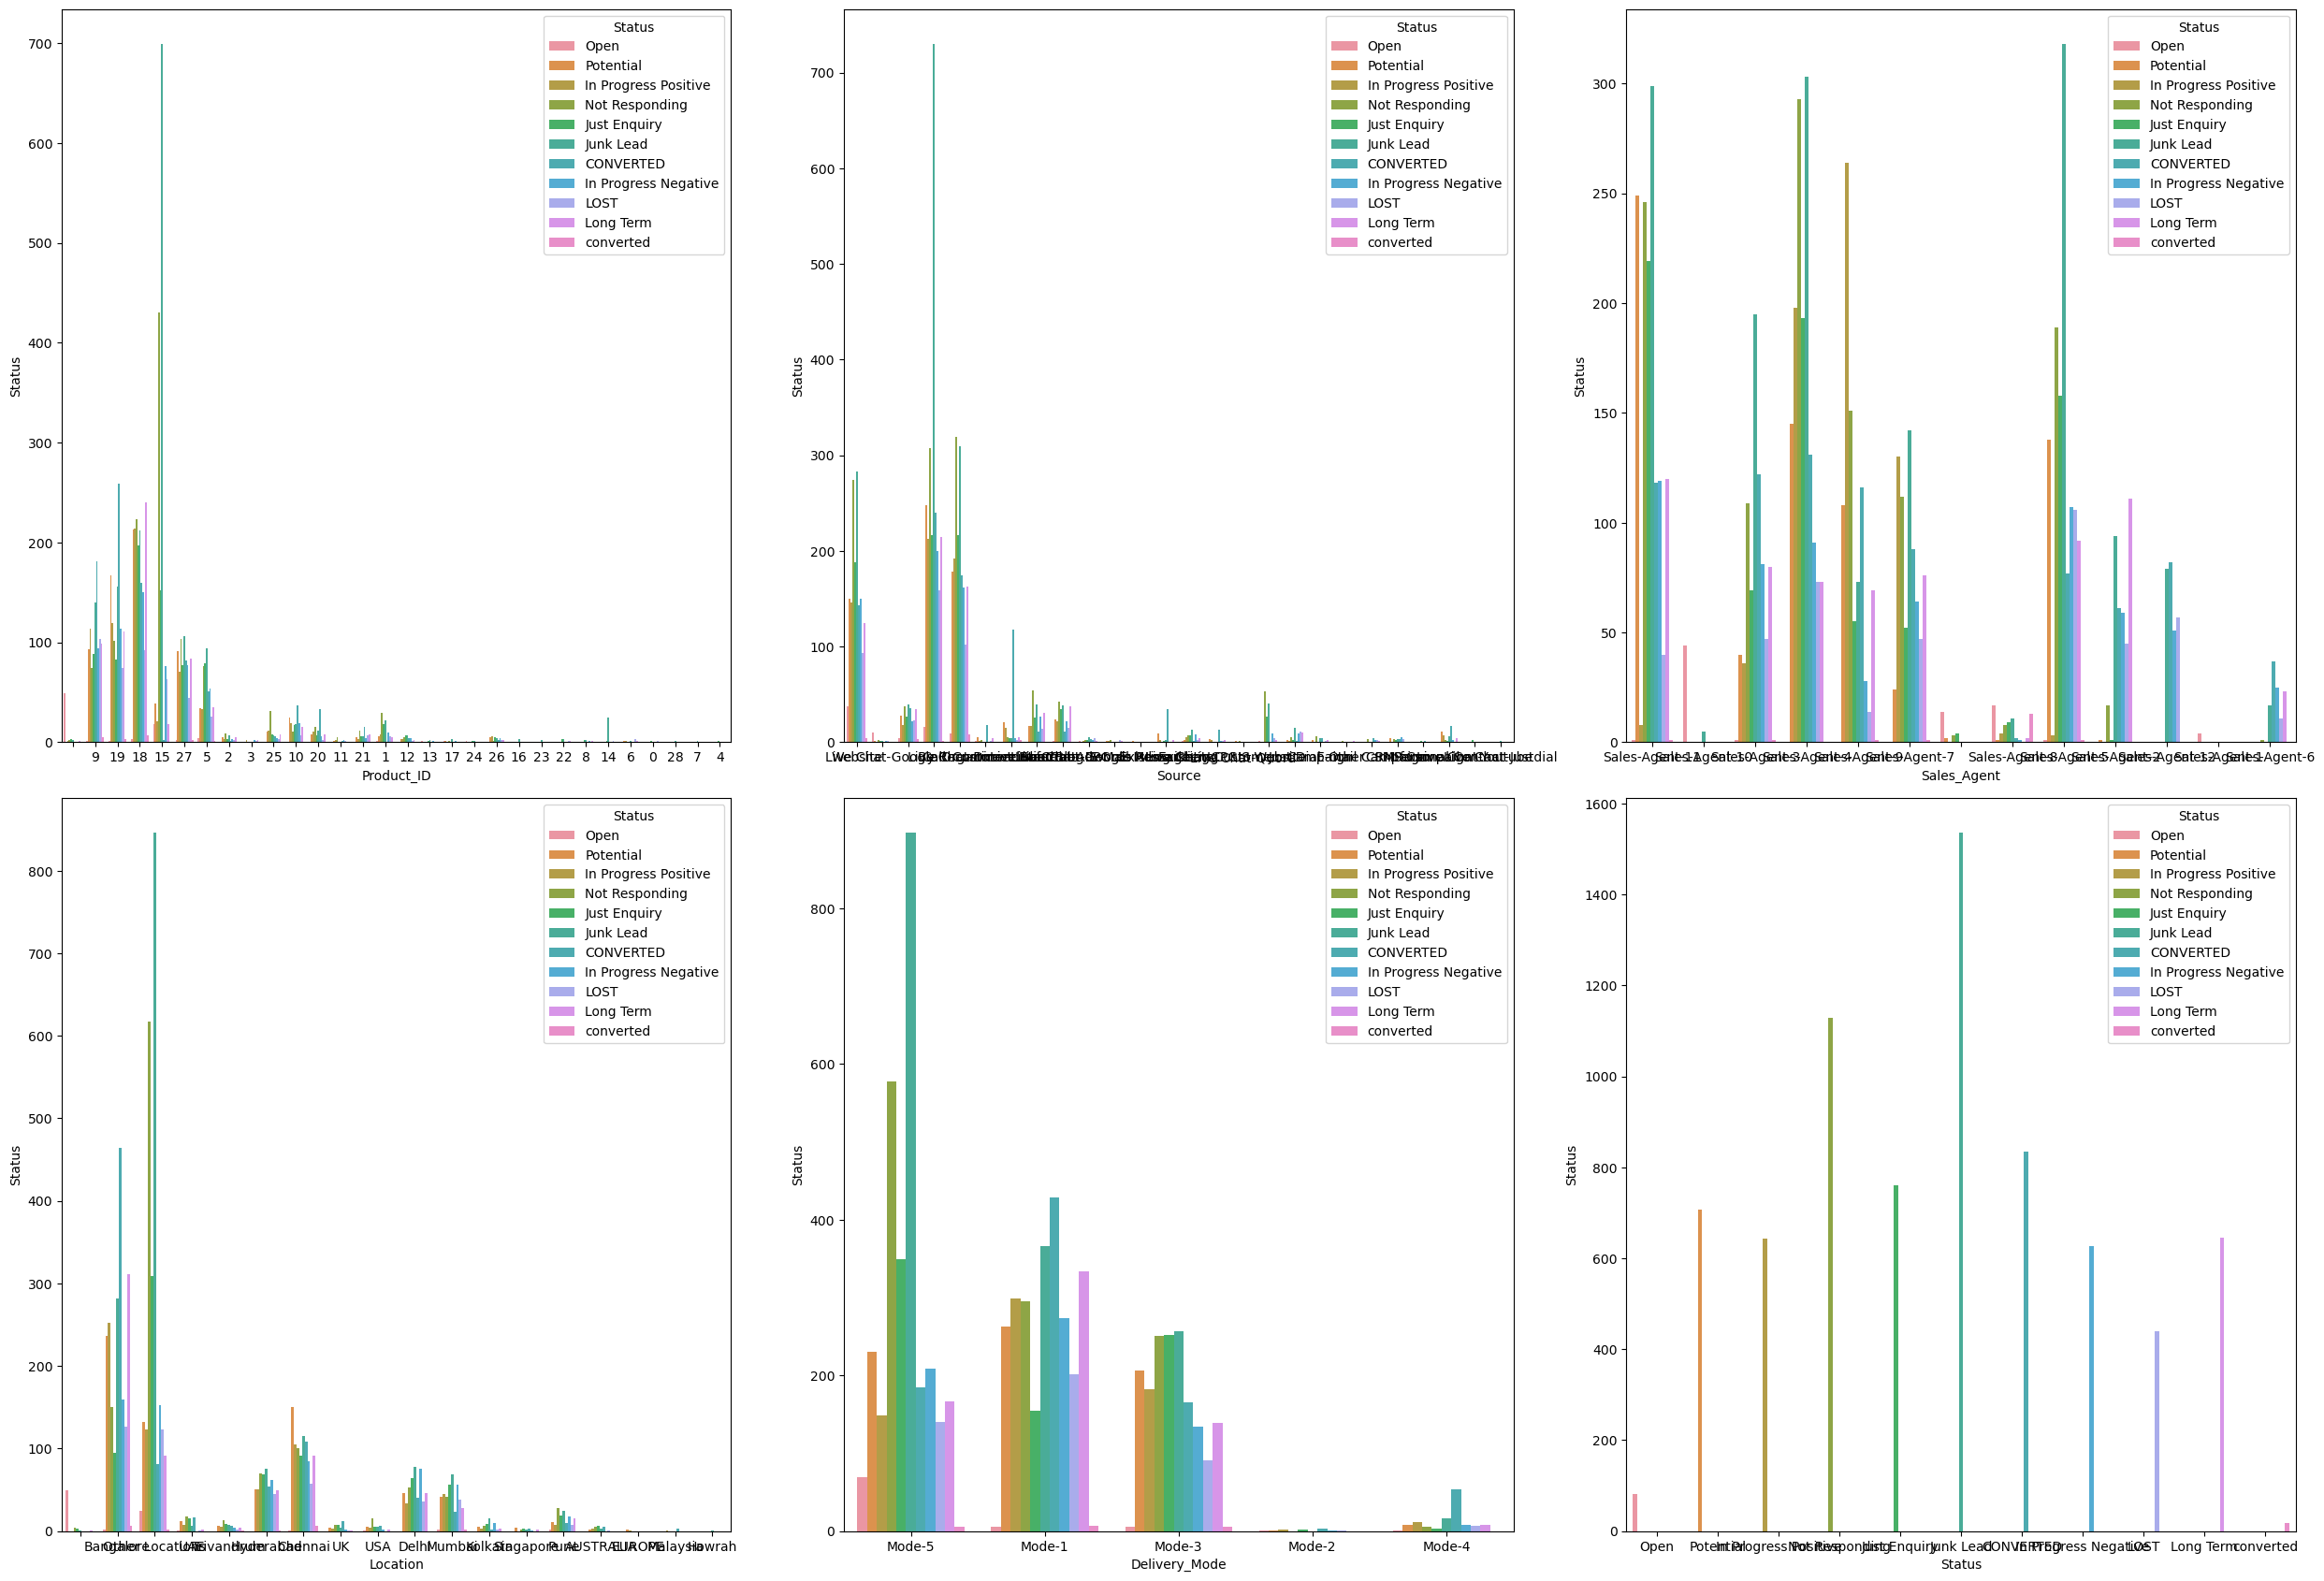

In [29]:
# Plotting how every categorical feature correlate with the "target".

plt.figure(figsize=(25,25)) 
plotnumber = 1  

# Iterate through each column in the data
for column in data:     
        plt.subplot(3,3,plotnumber) 
        sns.countplot(x = data[column].dropna(axis=0), hue = data.Status) 
        
        plt.xlabel(column)
        plt.ylabel('Status')
        plt.legend(title='Status', loc='upper right')
        
        plotnumber+=1 
        
plt.tight_layout()


###### ==================================================================================================================

# Data Preprocessing and Feature Engineering :

In [30]:
data.head(1)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,,Website,Sales-Agent-11,,Mode-5,Open


In [31]:
data.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [32]:
data.Product_ID.unique() 

array(['', '9', '19', '18', '15', '27', '5', '2', '3', '25', '10', '20',
       '11', '21', '1', '12', '13', '17', '24', '26', '16', '23', '22',
       '8', '14', '6', '0', '28', '7', '4'], dtype=object)

In [33]:
data.Source.unique() 

array(['Website', '', 'Live Chat-Google Organic', 'Call',
       'Live Chat-Direct', 'By Recommendation', 'Customer Referral',
       'Live Chat-Blog', 'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [34]:
data.Sales_Agent.unique()

array(['Sales-Agent-11', 'Sales-Agent-10', 'Sales-Agent-3',
       'Sales-Agent-4', 'Sales-Agent-9', 'Sales-Agent-7', '',
       'Sales-Agent-8', 'Sales-Agent-5', 'Sales-Agent-2',
       'Sales-Agent-12', 'Sales-Agent-1', 'Sales-Agent-6'], dtype=object)

In [35]:
data.Location.unique()

array(['', 'Bangalore', 'Other Locations', 'UAE', 'Trivandrum',
       'Hyderabad', 'Chennai', 'UK', 'USA', 'Delhi', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

In [36]:
data.Delivery_Mode.unique()

array(['Mode-5', 'Mode-1', 'Mode-3', 'Mode-2', 'Mode-4'], dtype=object)

In [37]:
data.Status.unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [38]:
# Deleting some rows with missing values 
data.replace('', np.nan, inplace=True)       # Replacing empty values with nan
data.dropna(inplace=True)                    # Dropping rows with missing values

In [39]:
# Resetting the index of the DataFrame
data.reset_index(inplace=True, drop=True)   

In [40]:
data.shape

(7328, 6)

### In some of the columns having a lot of different labels, so we have to compressing and merging the labels such that only important labels were included.

In [41]:
data.Product_ID.value_counts() 

18    1706
15    1501
19    1188
9      990
27     737
5      484
10     168
1      104
20     101
25      90
21      65
2       38
12      36
26      31
14      27
11      12
22       8
3        7
6        7
8        6
17       6
13       4
16       3
24       2
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64

In [42]:
#In "Product_ID" Sales of some products are very less 
# So we compressing and Merging the 14 labels in "Product_ID" column.

data.Product_ID.replace(['11','22','3','6','8','17','13','16','24','23','0','28','7','4'],
                        'Less_Sold_Product',inplace=True)

In [43]:
data.Product_ID.unique() #now only 16labeles

array(['9', '19', '18', '15', '27', '5', '2', 'Less_Sold_Product', '25',
       '10', '20', '21', '1', '12', '26', '14'], dtype=object)

In [44]:
#data.Source.value_counts()
#data.Source.unique()

In [45]:
# Compressing and Merging the labels in "Source" column.

data.Source.replace ( ['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'], 'Live_Chat', inplace=True )

data.Source.replace ( ['Existing Client','CRM form','Personal Contact'], 'Existing_Customer', inplace=True )

data.Source.replace ( 'By Recommendation', 'Customer_Referral', inplace=True )

data.Source.replace ( ['US Website','Just Dial'], 'Website', inplace=True )

data.Source.replace ( ['E-mail Campaign','SMS Campaign','E-Mail Message','Other'], 'Campaign', inplace=True )


In [46]:
data.Source.unique()     #After compressing and merging, now we got imp labels only.

array(['Live_Chat', 'Call', 'Website', 'Customer_Referral',
       'Customer Referral', 'Campaign', 'Existing_Customer',
       'Existing Customer'], dtype=object)

In [47]:
data.Location.replace ( ['UAE','USA','UK','AUSTRALIA','Singapore','Malaysia','EUROPE'],'Foreign_Locations',inplace=True)

In [48]:
data.Location.unique()   #After compressing and merging, now we got imp labels only.

array(['Bangalore', 'Other Locations', 'Trivandrum', 'Hyderabad',
       'Chennai', 'Foreign_Locations', 'Delhi', 'Mumbai', 'Kolkata',
       'Pune', 'Howrah'], dtype=object)

In [49]:
# Defining 'Status' as 'Good' or 'Bad' that easy to categorize the lead quality

data.Status.replace ( ['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'], 'Good', inplace=True)
data.Status.replace ( ['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],     'Bad', inplace=True)

In [50]:
data.Status.unique()     #After compressing and merging, now we got only two labels.

array(['Good', 'Bad'], dtype=object)

In [51]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,Live_Chat,Sales-Agent-3,Bangalore,Mode-1,Good
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,Good
2,18,Website,Sales-Agent-11,Trivandrum,Mode-1,Good
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Bad
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,Good


In [52]:
data.describe()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
count,7328,7328,7328,7328,7328,7328
unique,16,8,11,11,5,2
top,18,Live_Chat,Sales-Agent-4,Other Locations,Mode-5,Bad
freq,1706,2663,1495,2481,2903,4466


<Axes: >

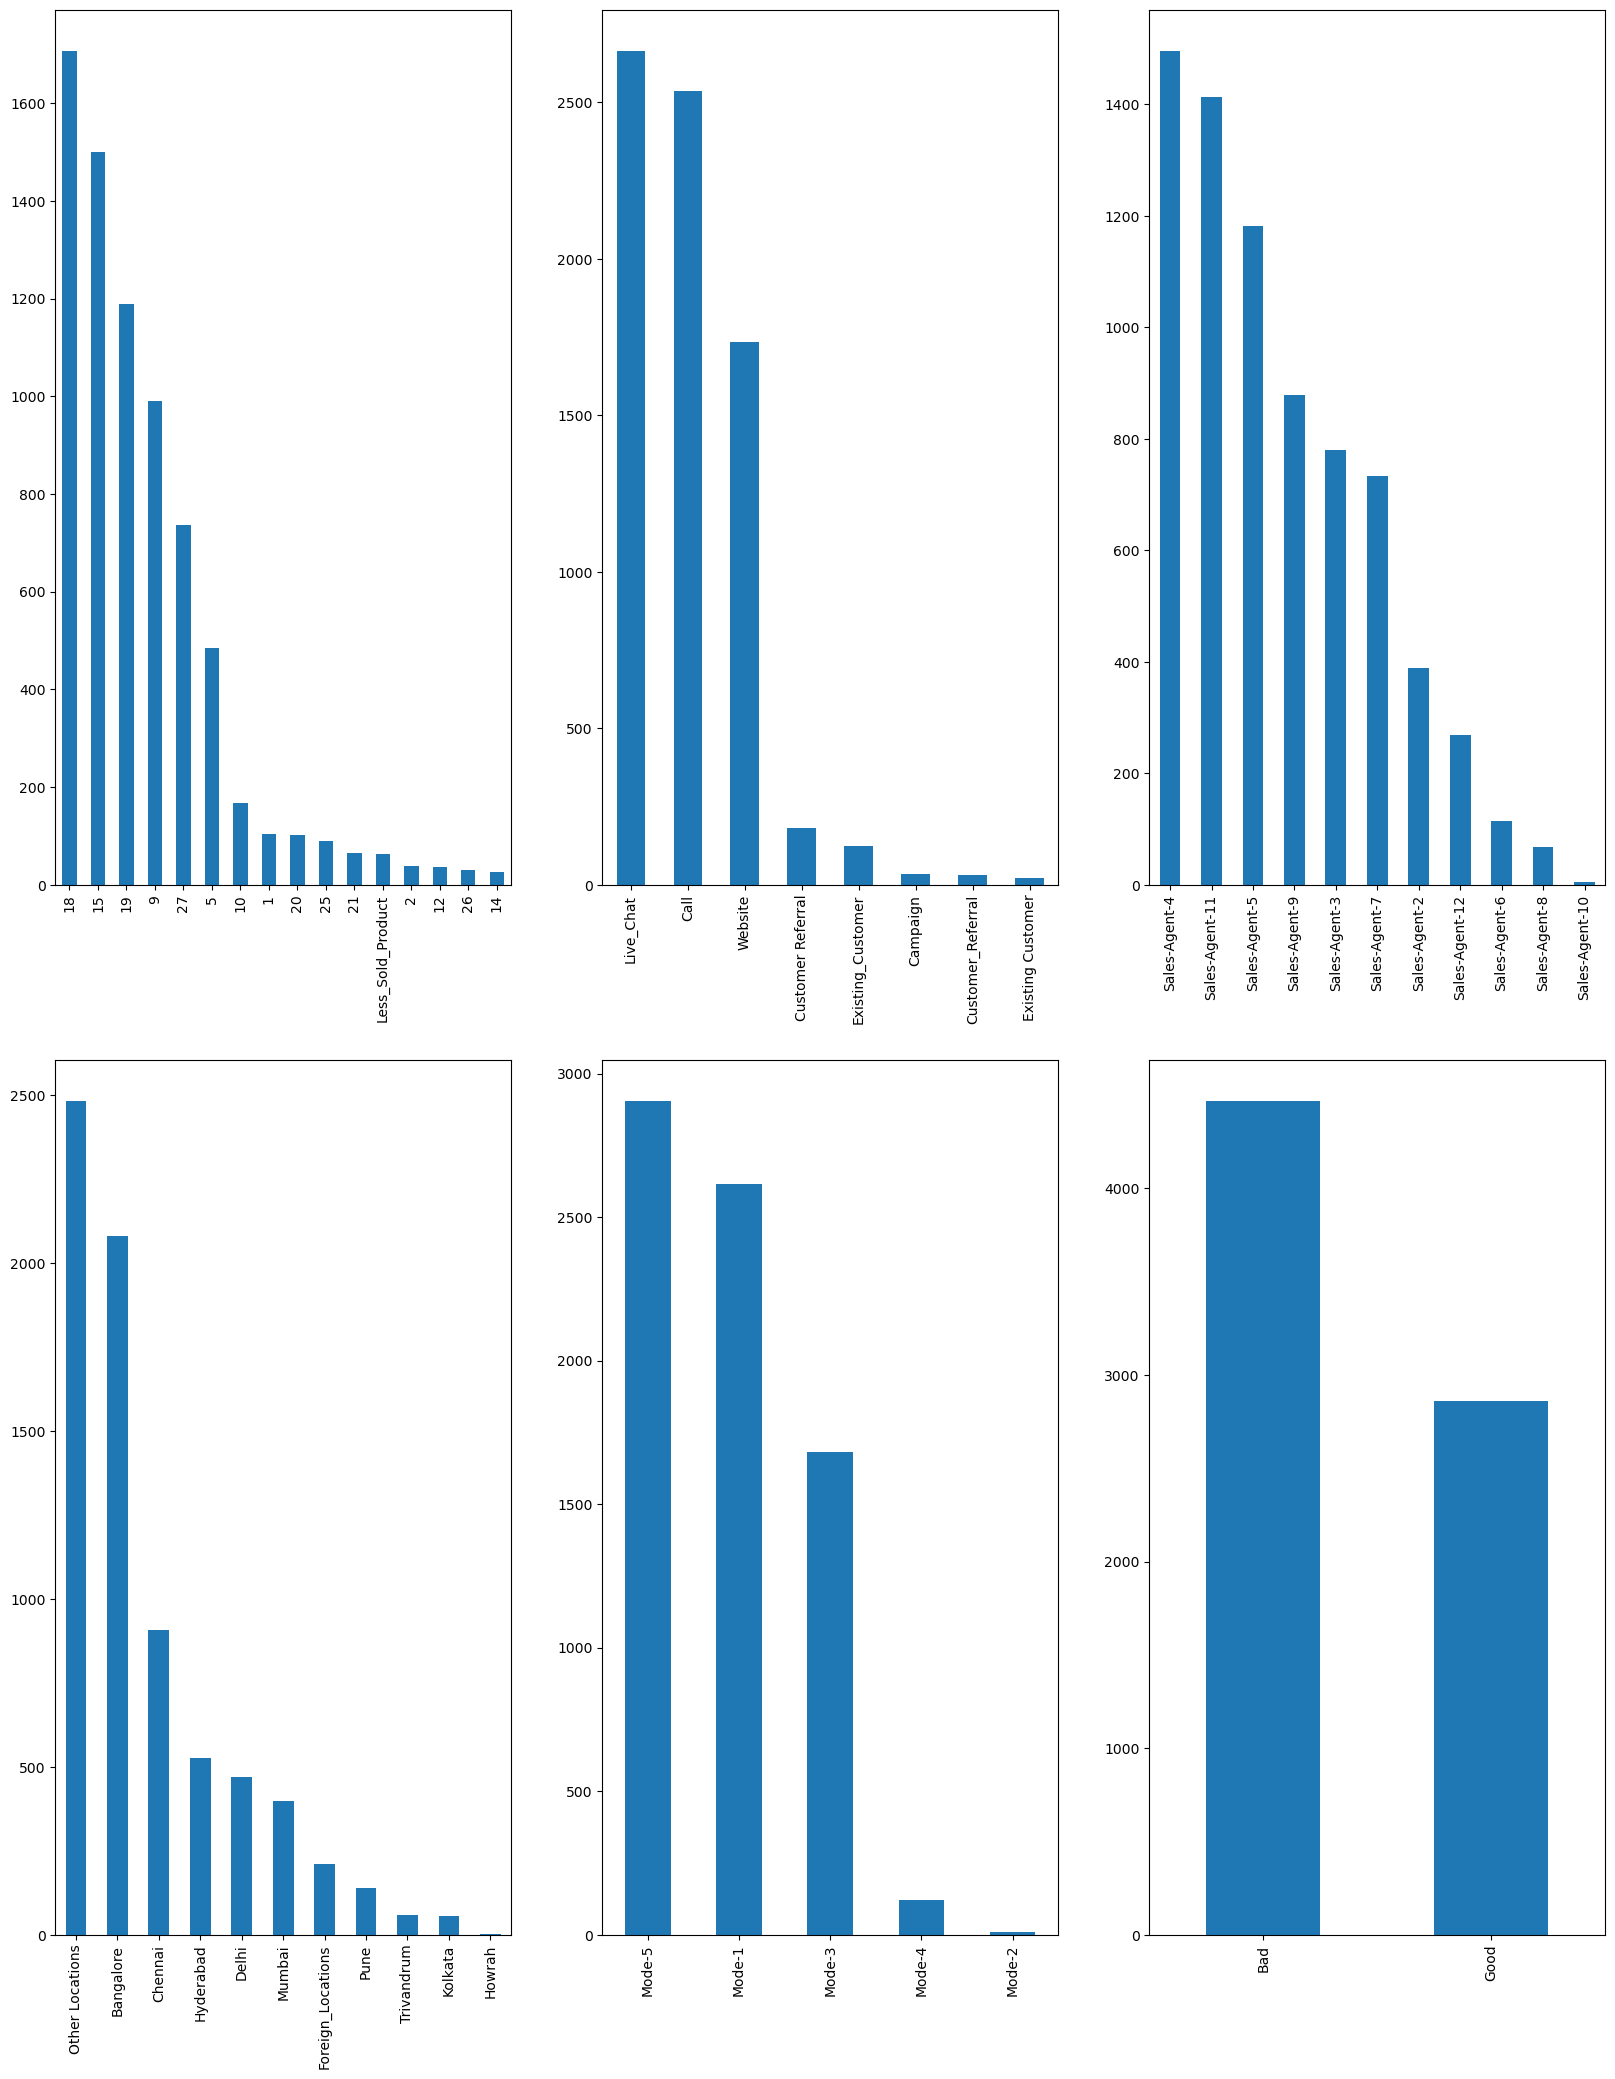

In [53]:
# Plotting the labels in each Features

plt.figure(figsize=(20,25))

plt.subplot(2,3,1)
data.Product_ID.value_counts().plot(kind='bar')

plt.subplot(2,3,2)
data.Source.value_counts().plot(kind='bar')

plt.subplot(2,3,3)
data.Sales_Agent.value_counts().plot(kind='bar')

plt.subplot(2,3,4)
data.Location.value_counts().plot(kind='bar')

plt.subplot(2,3,5)
data.Delivery_Mode.value_counts().plot(kind='bar')

plt.subplot(2,3,6)
data.Status.value_counts().plot(kind='bar')

## Convert Categorical Data Into Numerical Using Lable Encoding Technique :

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_ID     7328 non-null   object
 1   Source         7328 non-null   object
 2   Sales_Agent    7328 non-null   object
 3   Location       7328 non-null   object
 4   Delivery_Mode  7328 non-null   object
 5   Status         7328 non-null   object
dtypes: object(6)
memory usage: 343.6+ KB


In [55]:
categorical_col = []  

for column in data:    
    if data[column].dtype == object and len(data[column].unique()): 
        categorical_col.append(column)                                   
        
        print(f"{column} : {data[column].unique()}")   
        print("======================================================================")

Product_ID : ['9' '19' '18' '15' '27' '5' '2' 'Less_Sold_Product' '25' '10' '20' '21'
 '1' '12' '26' '14']
Source : ['Live_Chat' 'Call' 'Website' 'Customer_Referral' 'Customer Referral'
 'Campaign' 'Existing_Customer' 'Existing Customer']
Sales_Agent : ['Sales-Agent-3' 'Sales-Agent-4' 'Sales-Agent-11' 'Sales-Agent-7'
 'Sales-Agent-9' 'Sales-Agent-8' 'Sales-Agent-5' 'Sales-Agent-2'
 'Sales-Agent-12' 'Sales-Agent-10' 'Sales-Agent-6']
Location : ['Bangalore' 'Other Locations' 'Trivandrum' 'Hyderabad' 'Chennai'
 'Foreign_Locations' 'Delhi' 'Mumbai' 'Kolkata' 'Pune' 'Howrah']
Delivery_Mode : ['Mode-1' 'Mode-5' 'Mode-3' 'Mode-2' 'Mode-4']
Status : ['Good' 'Bad']


In [56]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in data:
    data[col] = label_encoder.fit_transform(data[col])


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product_ID     7328 non-null   int32
 1   Source         7328 non-null   int32
 2   Sales_Agent    7328 non-null   int32
 3   Location       7328 non-null   int32
 4   Delivery_Mode  7328 non-null   int32
 5   Status         7328 non-null   int32
dtypes: int32(6)
memory usage: 171.9 KB


In [58]:
# Checking the correlation coeffecient
data.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.074161,0.051984,-0.209239,-0.165999,0.116390
Source,0.074161,1.000000,-0.020846,-0.009438,-0.219744,-0.018364
Sales_Agent,0.051984,-0.020846,1.000000,-0.135705,-0.224688,0.137074
Location,-0.209239,-0.009438,-0.135705,1.000000,0.405141,-0.342604
Delivery_Mode,-0.165999,-0.219744,-0.224688,0.405141,1.000000,-0.220445
Status,0.116390,-0.018364,0.137074,-0.342604,-0.220445,1.000000


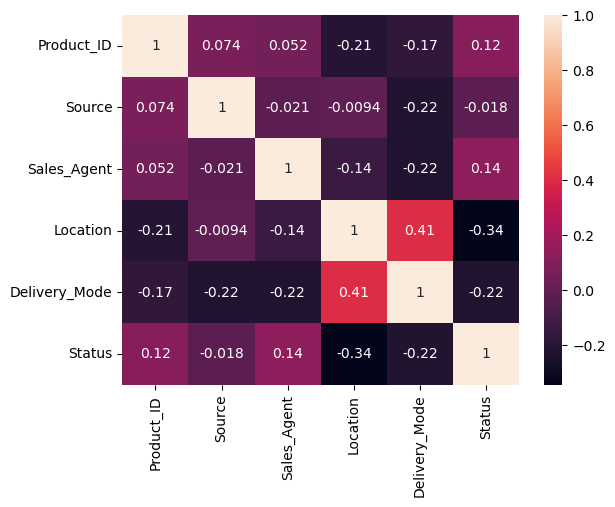

In [59]:
sns.heatmap(data.corr(),annot=True)
plt.show()

###### =================================================================================================================

# Model Creation :

In [60]:
# create dependent and independent variable
X = data.drop(['Status'], axis=1)
y = data[['Status']]

In [61]:
X.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,14,6,4,0,0
1,6,0,5,8,4
2,5,7,1,10,0
3,4,7,8,5,0
4,5,0,8,0,0


In [62]:
y.head()

,Status
0,1
1,1
2,1
3,0
4,1


In [63]:
# Spliting data to training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [64]:
X_train

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
381,4,0,5,8,4
1506,4,7,10,1,2
7295,5,7,1,9,0
6165,5,0,4,1,0
1234,4,0,5,8,4
...,...,...,...,...,...
2014,5,6,8,3,4
6253,4,0,5,8,4
1931,8,5,4,0,3
5600,5,6,5,1,2


In [65]:
y_train

,Status
381,0
1506,1
7295,0
6165,0
1234,0
...,...
2014,0
6253,0
1931,1
5600,0


In [66]:
print("X_train shape :",X_train.shape)
print("y_train shape :",y_train.shape)

X_train shape : (5496, 5)
y_train shape : (5496, 1)


### Balancing the dataset by using SMOTE oversampling technique :

In [67]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train_smote, y_train_smote = sm.fit_resample(X,y)

In [68]:
print("after X_train smote shape :",X_train_smote.shape)
print("after y_train smote shape :",y_train_smote.shape)

after X_train smote shape : (8932, 5)
after y_train smote shape : (8932, 1)


## 1) Model creation by using "Logistic Regression" : 

In [69]:
# Training the model
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [70]:
# Predicting the model
y_predict_LR = LR.predict(X_test)
y_predict_LR

array([0, 0, 0, ..., 1, 1, 1])

In [71]:
# Model evaluation
# We create user define function evaluate_model, it will be easy for all model evaluation.

from sklearn import metrics

def evaluate_model(model, x_test, y_test):  
    y_predict = model.predict(x_test) 

    # Calculate accuracy, precision, recall, f1-score
    acc  = metrics.accuracy_score(y_test, y_predict)
    prec = metrics.precision_score(y_test, y_predict)
    rec  = metrics.recall_score(y_test, y_predict)
    f1   = metrics.f1_score(y_test, y_predict)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_predict)
    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'cm': cm}

In [72]:
# Logistic Regression Evaluation:

LR_eval = evaluate_model(LR, X_test, y_test)
print('Accuracy:',  LR_eval['acc'])
print('Precision:', LR_eval['prec'])
print('Recall:',    LR_eval['rec'])
print('F1 Score:',  LR_eval['f1'])
print('Confusion Matrix : \n' , LR_eval['cm'])

Accuracy: 0.648471615720524
Precision: 0.5430752453653217
Recall: 0.6887966804979253
F1 Score: 0.6073170731707318
Confusion Matrix : 
 [[690 419]
 [225 498]]


###### =============================================================================================================

## 2) Model creation by using K-Nearest Nieghbor (KNN) :

In [73]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=6, metric='euclidean') 
KNN.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [74]:
# Predicting the model
y_predict_knn = KNN.predict(X_test)
y_predict_knn

array([0, 0, 0, ..., 1, 1, 1])

In [75]:
# KNN Model Evaluation:

KNN_eval = evaluate_model(KNN, X_test, y_test)
print('Accuracy:',  KNN_eval['acc'])
print('Precision:', KNN_eval['prec'])
print('Recall:',    KNN_eval['rec'])
print('F1 Score:',  KNN_eval['f1'])
print('Confusion Matrix : \n' , KNN_eval['cm'])

Accuracy: 0.7565502183406113
Precision: 0.706408345752608
Recall: 0.6556016597510373
F1 Score: 0.6800573888091822
Confusion Matrix : 
 [[912 197]
 [249 474]]


###### =================================================================================================================

## 3) Model creation by using Naive Bayes :

In [76]:
# Training the model
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB()
NB.fit(X_train_smote, y_train_smote)

BernoulliNB()

In [77]:
# Predicting the model
y_predict_nb = NB.predict(X_test)
y_predict_nb

array([0, 0, 0, ..., 0, 1, 1])

In [78]:
# Naive Bayes Model Evaluation:

NB_eval = evaluate_model(NB, X_test, y_test)
print('Accuracy:',  NB_eval['acc'])
print('Precision:', NB_eval['prec'])
print('Recall:',    NB_eval['rec'])
print('F1 Score:',  NB_eval['f1'])
print('Confusion Matrix : \n' , NB_eval['cm'])

Accuracy: 0.6457423580786026
Precision: 0.5490716180371353
Recall: 0.5726141078838174
F1 Score: 0.5605958023019635
Confusion Matrix : 
 [[769 340]
 [309 414]]


###### ==================================================================================================================

## 4) Model creation by using Support Vector Machine :

In [79]:
# Training SVM model
from sklearn.svm import SVC

svc = SVC() 
svc.fit(X_train_smote, y_train_smote)

SVC()

In [80]:
# Predicting the model
y_predict_svm = svc.predict(X_test)

In [81]:
# Naive Bayes Model Evaluation:

SVM_eval = evaluate_model(svc, X_test, y_test)
print('Accuracy:',  SVM_eval['acc'])
print('Precision:', SVM_eval['prec'])
print('Recall:',    SVM_eval['rec'])
print('F1 Score:',  SVM_eval['f1'])
print('Confusion Matrix : \n' , SVM_eval['cm'])

Accuracy: 0.6610262008733624
Precision: 0.5529045643153527
Recall: 0.7372060857538036
F1 Score: 0.6318909306461175
Confusion Matrix : 
 [[678 431]
 [190 533]]


###### =================================================================================================================

## 5) Model creation by using Decision Tree Classifier :

In [82]:
#Training model
from sklearn.tree import DecisionTreeClassifier  

dtc = DecisionTreeClassifier()                      
dtc.fit(X_train_smote, y_train_smote) 

#Predicting model
y_predict = dtc.predict(X_test)                         
y_predict 

array([0, 0, 0, ..., 1, 1, 1])

In [83]:
# Decision Tree Evaluation:

dtc_eval = evaluate_model(dtc, X_test, y_test)
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Confusion Matrix : \n' , dtc_eval['cm'])

Accuracy: 0.8160480349344978
Precision: 0.7493540051679587
Recall: 0.8022130013831259
F1 Score: 0.7748830995323982
Confusion Matrix : 
 [[915 194]
 [143 580]]


###### =================================================================================================================

## 6) Model creation by using Random Forest :

In [84]:
#Training model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=0)

In [85]:
#Predicting model
y_predict = rfc.predict(X_test)                         
y_predict 

array([0, 0, 0, ..., 1, 1, 1])

In [86]:
# Random Forest Evaluation:

rfc_eval = evaluate_model(rfc, X_test, y_test)
print('Accuracy:', rfc_eval['acc'])
print('Precision:', rfc_eval['prec'])
print('Recall:', rfc_eval['rec'])
print('F1 Score:', rfc_eval['f1'])
print('Confusion Matrix : \n' , rfc_eval['cm'])

Accuracy: 0.8138646288209607
Precision: 0.7284688995215312
Recall: 0.8423236514522822
F1 Score: 0.7812700449005774
Confusion Matrix : 
 [[882 227]
 [114 609]]


###### =================================================================================================================

## 7) Model creation using XG Boost :

In [87]:
#Training model
import xgboost
from xgboost import XGBClassifier

xgc=XGBClassifier()
xgc.fit(X_train_smote, y_train_smote)
y_predict = xgc.predict(X_test)                         
y_predict 

array([0, 0, 0, ..., 1, 1, 1])

In [88]:
# XGBoost Evaluation:
xg_eval = evaluate_model(xgc, X_test, y_test)

print('Accuracy:', xg_eval['acc'])
print('Precision:', xg_eval['prec'])
print('Recall:', xg_eval['rec'])
print('F1 Score:', xg_eval['f1'])
print('Confusion Matrix : \n' , xg_eval['cm'])

Accuracy: 0.7783842794759825
Precision: 0.6875739644970414
Recall: 0.8035961272475796
F1 Score: 0.7410714285714286
Confusion Matrix : 
 [[845 264]
 [142 581]]


###### ================================================================================================================== 

## Model Comparison :

In [89]:
column_labels = ['Classifier','Accuracy','Recall','Precision','F1-score']

# Decision tree 
df1= pd.DataFrame([[ 'DecisionTree',  dtc_eval['acc'], dtc_eval['rec'], dtc_eval['prec'], dtc_eval['f1'] ]], columns = column_labels )
                 
# Random forest
df2 = pd.DataFrame([[ 'RandomForest', rfc_eval['acc'], rfc_eval['rec'], rfc_eval['prec'], rfc_eval['f1'] ]] , columns = column_labels )

# XGBoosting 
df3 = pd.DataFrame([[ 'XGBoosting',   xg_eval['acc'], xg_eval['rec'], xg_eval['prec'] , xg_eval['f1'] ]],columns =column_labels )

# KNN 
df4 = pd.DataFrame([[ 'KNN', KNN_eval['acc'],  KNN_eval['rec'], KNN_eval['prec'], KNN_eval['f1'] ]], columns = column_labels )

# Naive bayes 
df5 = pd.DataFrame([[ 'GuassianNB',   NB_eval['acc'], NB_eval['rec'], NB_eval['prec'], NB_eval['f1'] ]], columns = column_labels )

# SVM 
df6 = pd.DataFrame([[ 'SupportVectorMachine',  SVM_eval['acc'], SVM_eval['rec'], SVM_eval['prec'], SVM_eval['f1'] ]], columns = column_labels )

# logistic regression 
df7 = pd.DataFrame([[ 'LogisticRegression', LR_eval['acc'], LR_eval['rec'], LR_eval['prec'], LR_eval['f1'] ]], columns = column_labels )



In [90]:
data_concat= pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)
data_concat

,Classifier,Accuracy,Recall,Precision,F1-score
0,DecisionTree,0.816048,0.802213,0.749354,0.774883
0,RandomForest,0.813865,0.842324,0.728469,0.781270
0,XGBoosting,0.778384,0.803596,0.687574,0.741071
0,KNN,0.756550,0.655602,0.706408,0.680057
0,GuassianNB,0.645742,0.572614,0.549072,0.560596
0,SupportVectorMachine,0.661026,0.737206,0.552905,0.631891
0,LogisticRegression,0.648472,0.688797,0.543075,0.607317


### After comparing multiple models we can say that "Decision_Tree" is best fit model for this dataset. 

###### ==================================================================================================================